Stock  exchanges  and  financial  data  providers

In [3]:
import yfinance as yf
import datetime

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2022, 3, 31)

# Fetching data directly using yfinance
aapl = yf.download('AAPL', start=start, end=end)

print(aapl.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.793777  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.029243  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.481922  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.402950  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.077839  164101200


Python code that demonstrates how to retrieve historical stock data for Apple (AAPL) from the Bloomberg API using the blpapi library

The blpapi library is not available through the default Python Package Index (PyPI). Instead, you need to download and install it directly from Bloomberg's website. Here are the steps to install the Bloomberg API library:

**Download the Bloomberg API SDK:**
Go to the Bloomberg API Libraries page and download the appropriate API SDK for your operating system.
https://bloomberg.github.io/blpapi-docs/

**Extract the SDK:**
Extract the downloaded SDK to a directory of your choice.

**Install the Python bindings:**
In the directory where you extracted the SDK, you'll find a folder named blpapi_python. Navigate to this folder and install the bindings using the following command:

In [ ]:
python -m pip install

Verify the installation: After installation, you can verify it by trying to import the blpapi library in a Python script or in an interactive Python session.italicized text

In [4]:
import blpapi
import pandas as pd

# Establish a session with the Bloomberg API
sessionOptions = blpapi.SessionOptions()
sessionOptions.setServerHost("localhost")
sessionOptions.setServerPort(8194)
session = blpapi.Session(sessionOptions)
session.start()

# Define the historical data request
request = session.createRequest("HistoricalDataRequest")
request.set("securities", "AAPL US Equity")
request.set("fields", "PX_LAST")
request.set("startDate", "20190101")
request.set("endDate", "20230331")

# Send the request and wait for the response
session.sendRequest(request)
response = session.nextEvent()
data = []
while True:
    if response.eventType() == blpapi.Event.RESPONSE or response.eventType() == blpapi.Event.PARTIAL_RESPONSE:
        for msg in response:
            if msg.hasElement("securityData"):
                sec_data = msg.getElement("securityData")
                if sec_data.hasElement("fieldData"):
                    for field in sec_data.getElement("fieldData").values():
                        date = pd.to_datetime(field.getElementAsDatetime("date"))
                        value = field.getElementAsFloat("PX_LAST")
                        data.append({"Date": date, "Close": value})
    if response.eventType() == blpapi.Event.RESPONSE:
        break
    response = session.nextEvent()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)
df.set_index("Date", inplace=True)

# Print the top rows of the data
print(df.head())


ModuleNotFoundError: No module named 'blpapi'

**Alpha Vantage API to fetch real-time stock **

Alpha Vantage offers a free tier for API usage, which allows you to obtain a free API key by signing up on their website. However, for testing purposes, here is a demo key that you can use:



In [9]:
import requests

api_key = "demo"

def fetch_price(symbol):
    url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    if "Global Quote" in data and "05. price" in data["Global Quote"]:
        return data["Global Quote"]["05. price"]
    else:
        return "Price not available"

# NYSE
price_nyse = fetch_price("IBM")
print("NYSE:", price_nyse)

# NASDAQ
price_nasdaq = fetch_price("AAPL")
print("NASDAQ:", price_nasdaq)

# LSE
price_lse = fetch_price("BP")
print("LSE:", price_lse)

# TSE
price_tse = fetch_price("6758.T")
print("TSE:", price_tse)

# HKEX
price_hkex = fetch_price("00700.HK")
print("HKEX:", price_hkex)


NYSE: 191.9800
NASDAQ: Price not available
LSE: Price not available
TSE: Price not available
HKEX: Price not available


**Alternative data sources and indicators**

Most public APIs offer demo or trial keys for testing purposes, though they usually come with limitations on usage. For the News API, which seems to be what you're using based on the code, they provide a free plan with limited access. You can get a free API key by signing up on their [website](https://newsapi.org/).

The free plan usually has restrictions on the number of requests per day and the available features. If you need more extensive access, you can consider their paid plans.

In [ ]:
import requests

api_key = "YOUR_API_KEY"
topic = "Bitcoin"

url = f"https://newsapi.org/v2/top-headlines?q={topic}&apiKey={api_key}"
response = requests.get(url)
data = response.json()

articles = data["articles"]
for article in articles:
    title = article["title"]
    description = article["description"]
    url = article["url"]
    print(f"Title: {title}\nDescription: {description}\nURL: {url}\n")


**Twitter's API and collect real-time tweets related to specific stocks**

To get API keys for Tweepy, you'll need to create a Twitter Developer account and set up a project. Here's a step-by-step guide:

### 1. **Create a Twitter Developer Account**
   - Go to the [Twitter Developer Platform](https://developer.twitter.com/en) and sign in with your Twitter account.
   - Apply for a developer account if you haven't already. You might need to provide details about how you plan to use the API.

### 2. **Create a Project and App**
   - Once your developer account is approved, go to the [Developer Dashboard](https://developer.twitter.com/en/portal/dashboard).
   - Click on "Create Project" and fill out the required information. This includes the project name, description, and use case.
   - After creating the project, create an app within that project. You’ll need to provide additional details about the app, such as its name and description.

### 3. **Get Your API Keys and Tokens**
   - Once your app is created, navigate to the “Keys and tokens” tab within your app settings.
   - Here, you'll find your **API Key** and **API Secret Key** (also known as **Consumer Key** and **Consumer Secret**).
   - You can also generate **Access Token** and **Access Token Secret** from this tab.

### 4. **Use the Keys in Your Code**
   - Replace the placeholders in your code with the actual API keys and tokens you obtained.

Here’s a quick recap of where to find each item:

- **Consumer Key (API Key)**: `consumer_key`
- **Consumer Secret (API Secret Key)**: `consumer_secret`
- **Access Token**: `access_token`
- **Access Token Secret**: `access_token_secret`

If you encounter any issues during this process or need further assistance, feel free to ask!

In [ ]:
import tweepy

# API credentials
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# Collect tweets containing 'TSLA'
tweets = tweepy.Cursor(api.search, q='TSLA', lang='en').items(100)


**TextBlob library can be used for simple sentiment analysis**

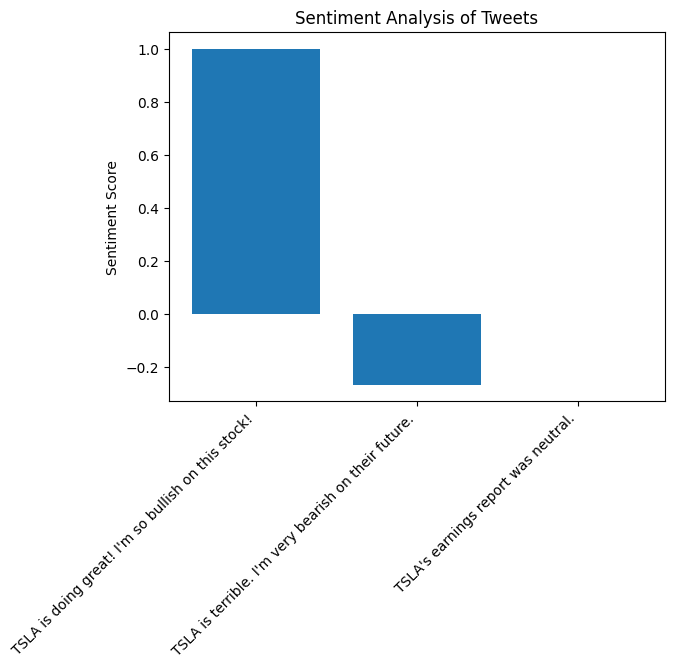

In [1]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Sample tweets
tweets = ["TSLA is doing great! I'm so bullish on this stock!",
          "TSLA is terrible. I'm very bearish on their future.",
          "TSLA's earnings report was neutral."]

# Analyze sentiment of tweets
sentiments = [TextBlob(tweet).sentiment.polarity for tweet in tweets]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(range(len(tweets)), sentiments)

# Set the x-axis labels
ax.set_xticks(range(len(tweets)))
ax.set_xticklabels(tweets, rotation=45, ha='right')

# Set the y-axis label and title
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of Tweets')

# Display the graph
plt.show()


The following Python code employs the pandas_datareader library to retrieve economic data including Gross Domestic Product (GDP), unemployment rate (UNRATE), and Consumer Price Index for All Urban Consumers (CPIAUCSL) from the Federal Reserve Economic Data (FRED) database, spanning from January 1, 2022, to December 31, 2023. This data retrieval enables analysis and tracking of key economic indicators over the specified time period.

In [2]:
import pandas_datareader.data as web
import datetime

start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

# Retrieve GDP, unemployment, and inflation rate data
gdp = web.get_data_fred('GDP', start_date, end_date)
unemployment = web.get_data_fred('UNRATE', start_date, end_date)
inflation = web.get_data_fred('CPIAUCSL', start_date, end_date)

print(gdp)
print(unemployment)
print(inflation)


                  GDP
DATE                 
2022-01-01  25029.116
2022-04-01  25544.273
2022-07-01  25994.639
2022-10-01  26408.405
2023-01-01  26813.601
2023-04-01  27063.012
2023-07-01  27610.128
2023-10-01  27956.998
            UNRATE
DATE              
2022-01-01     4.0
2022-02-01     3.8
2022-03-01     3.6
2022-04-01     3.7
2022-05-01     3.6
2022-06-01     3.6
2022-07-01     3.5
2022-08-01     3.6
2022-09-01     3.5
2022-10-01     3.6
2022-11-01     3.6
2022-12-01     3.5
2023-01-01     3.4
2023-02-01     3.6
2023-03-01     3.5
2023-04-01     3.4
2023-05-01     3.7
2023-06-01     3.6
2023-07-01     3.5
2023-08-01     3.8
2023-09-01     3.8
2023-10-01     3.8
2023-11-01     3.7
2023-12-01     3.7
            CPIAUCSL
DATE                
2022-01-01   282.390
2022-02-01   284.535
2022-03-01   287.553
2022-04-01   288.764
2022-05-01   291.359
2022-06-01   294.996
2022-07-01   294.977
2022-08-01   295.209
2022-09-01   296.341
2022-10-01   297.863
2022-11-01   298.648
2022-12-01   

This Python script utilizes the pandas_datareader library to extract data from the FRED database

In [3]:
import pandas_datareader.data as web
import datetime

start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

# Retrieve the Federal Reserve's federal funds rate data
fed_funds_rate = web.get_data_fred('FEDFUNDS', start_date, end_date)
print(fed_funds_rate)


            FEDFUNDS
DATE                
2023-01-01      4.33
2023-02-01      4.57
2023-03-01      4.65
2023-04-01      4.83
2023-05-01      5.06
2023-06-01      5.08
2023-07-01      5.12
2023-08-01      5.33
2023-09-01      5.33
2023-10-01      5.33
2023-11-01      5.33
2023-12-01      5.33


Retrieving the Consumer Sentiment Index data published by the University of Michigan

In [4]:
import pandas_datareader.data as web
import datetime

start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

# Retrieve the University of Michigan's Consumer Sentiment Index data
consumer_sentiment = web.get_data_fred('UMCSENT', start_date, end_date)
print(consumer_sentiment)


            UMCSENT
DATE               
2023-01-01     64.9
2023-02-01     66.9
2023-03-01     62.0
2023-04-01     63.7
2023-05-01     59.0
2023-06-01     64.2
2023-07-01     71.5
2023-08-01     69.4
2023-09-01     67.8
2023-10-01     63.8
2023-11-01     61.3
2023-12-01     69.7


The following Python script leverages pandas, yfinance, and pandas_ta libraries to analyze stock market data for Apple Inc. (AAPL).

In [6]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=c36c4d9bfee4de7711b766493ee7995235006f62d3184b69b8fb09fcbe484c6a
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [8]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import datetime

symbol = "AAPL"
aapl_data = yf.download(symbol, period='1y')

# Extract the 'Close' price column  aapl_data['Close']

# Calculate the 5-day simple moving average
sma = ta.sma(aapl_data['Close'], length=5)

# Calculate the MACD
macd = ta.macd(aapl_data['Close'], fast=12, slow=26, signal=9)

if macd is not None:
    # Add the calculated indicators to the data frame
    aapl_data['SMA'] = sma
    aapl_data['MACD'] = macd['MACD_12_26_9']
    aapl_data['Signal'] = macd['MACDs_12_26_9']
    aapl_data['MACD_Hist'] = macd['MACDh_12_26_9']
else:
    print("MACD calculation failed")

# Print the updated data frame
print(aapl_data.tail(10))


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-12  228.919998  232.639999  228.679993  230.539993  230.539993   
2024-07-15  236.479996  237.229996  233.089996  234.399994  234.399994   
2024-07-16  235.000000  236.270004  232.330002  234.820007  234.820007   
2024-07-17  229.449997  231.460007  226.639999  228.880005  228.880005   
2024-07-18  230.279999  230.440002  222.270004  224.179993  224.179993   
2024-07-19  224.820007  226.800003  223.279999  224.309998  224.309998   
2024-07-22  227.009995  227.779999  223.089996  223.960007  223.960007   
2024-07-23  224.369995  226.940002  222.679993  225.009995  225.009995   
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.539993   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.490005   

              Volume         SMA      MACD    Signal  MACD_Hist  
Date                                         

The following Python script utilizes the pandas, yfinance, and pandas_ta libraries to analyze stock market data for Microsoft Corporation (MSFT).

In [9]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import datetime

symbol = 'MSFT'
msft_data = yf.download(symbol, period='1mo')

# Calculate the 14-day RSI
rsi = ta.rsi(msft_data['Close'], length=14)

# Calculate the Stochastic Oscillator
stoch = ta.stoch(msft_data['High'], msft_data['Low'], msft_data['Close'])

# Add the calculated indicators to the data frame
msft_data['RSI'] = rsi
msft_data['%K'] = stoch['STOCHk_14_3_3'] # First Column
msft_data['%D'] = stoch['STOCHd_14_3_3']

# Print the updated data frame
print(msft_data.tail(10))


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-12  454.329987  456.359985  450.649994  453.549988  453.549988   
2024-07-15  453.299988  457.260010  451.429993  453.959991  453.959991   
2024-07-16  454.220001  454.299988  446.660004  449.519989  449.519989   
2024-07-17  442.589996  444.850006  439.179993  443.519989  443.519989   
2024-07-18  444.339996  444.649994  434.399994  440.369995  440.369995   
2024-07-19  433.100006  441.140015  432.000000  437.109985  437.109985   
2024-07-22  441.790009  444.600006  438.910004  442.940002  442.940002   
2024-07-23  443.899994  448.390015  443.100006  444.850006  444.850006   
2024-07-24  440.450012  441.480011  427.589996  428.899994  428.899994   
2024-07-25  428.799988  429.799988  417.510010  418.399994  418.399994   

              Volume        RSI         %K         %D  
Date                                                   

This Python script utilizes the pandas, yfinance, and pandas_ta libraries to analyze stock market data for MSFT. It retrieves one month of historical stock data and calculates key technical indicators including Bollinger Bands and the 14-day ATR to assess volatility and potential price reversals.

In [10]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import datetime

symbol = 'MSFT'
msft_data = yf.download(symbol, period='1mo')

# Extract the 'Close' price column
price_data = msft_data['Close']

# Calculate Bollinger Bands
bb = ta.bbands(price_data, length=20)

# Calculate the 14-day ATR
atr = ta.atr(msft_data['High'], msft_data['Low'], price_data, length=14)

# Add the calculated indicators to the data frame
msft_data['BB_upperband'] = bb['BBL_20_2.0']
msft_data['BB_middleband'] = bb['BBM_20_2.0']
msft_data['BB_lowerband'] = bb['BBU_20_2.0']
msft_data['ATR'] = atr

# Print the updated data frame
print(msft_data.tail(10))


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-12  454.329987  456.359985  450.649994  453.549988  453.549988   
2024-07-15  453.299988  457.260010  451.429993  453.959991  453.959991   
2024-07-16  454.220001  454.299988  446.660004  449.519989  449.519989   
2024-07-17  442.589996  444.850006  439.179993  443.519989  443.519989   
2024-07-18  444.339996  444.649994  434.399994  440.369995  440.369995   
2024-07-19  433.100006  441.140015  432.000000  437.109985  437.109985   
2024-07-22  441.790009  444.600006  438.910004  442.940002  442.940002   
2024-07-23  443.899994  448.390015  443.100006  444.850006  444.850006   
2024-07-24  440.450012  441.480011  427.589996  428.899994  428.899994   
2024-07-25  428.799988  429.799988  417.510010  418.399994  418.399994   

              Volume  BB_upperband  BB_middleband  BB_lowerband       ATR  
Date                               

pandas and TA-Lib libraries can be used to calculate the OBV and CMF

In [11]:
import yfinance as yf
import pandas_ta as ta

# Fetch Microsoft's stock price data
symbol = 'MSFT'
msft_data = yf.download(symbol, period='1mo')

# Calculate On-Balance Volume (OBV)
obv = ta.obv(msft_data['Close'], msft_data['Volume'])

# Calculate Chaikin Money Flow (CMF)
cmf = ta.cmf(high=msft_data['High'], low=msft_data['Low'], close=msft_data['Close'], volume=msft_data['Volume'], window=20)

# Add the calculated indicators to the data frame
msft_data['OBV'] = obv
msft_data['CMF'] = cmf

# Print the updated data frame
print(msft_data.tail(10))


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-12  454.329987  456.359985  450.649994  453.549988  453.549988   
2024-07-15  453.299988  457.260010  451.429993  453.959991  453.959991   
2024-07-16  454.220001  454.299988  446.660004  449.519989  449.519989   
2024-07-17  442.589996  444.850006  439.179993  443.519989  443.519989   
2024-07-18  444.339996  444.649994  434.399994  440.369995  440.369995   
2024-07-19  433.100006  441.140015  432.000000  437.109985  437.109985   
2024-07-22  441.790009  444.600006  438.910004  442.940002  442.940002   
2024-07-23  443.899994  448.390015  443.100006  444.850006  444.850006   
2024-07-24  440.450012  441.480011  427.589996  428.899994  428.899994   
2024-07-25  428.799988  429.799988  417.510010  418.399994  418.399994   

              Volume         OBV       CMF  
Date                                        
2024-07-12  16324300 

alpha_vantage library can be used to access data from the Alpha Vantage API.

You can use a trial key from Alpha Vantage, which is often available for free on their website. To apply a trial key, just replace 'your_api_key' with the trial key you receive. Here's an example:



In [ ]:

from alpha_vantage.timeseries import TimeSeries

api_key = 'YOUR_TRIAL_API_KEY'  # Replace with your trial API key
symbol = 'MSFT'

ts = TimeSeries(api_key)
data, meta_data = ts.get_daily(symbol=symbol, outputsize='compact')

print(data)

the intrinio_sdk library can be used to access data from the Intrinio API:

In [ ]:
import intrinio_sdk
api_key = 'your_api_key'
symbol = 'AAPL'

intrinio_sdk.ApiClient().configuration.api_key['api_key'] = api_key
security_api = intrinio_sdk.SecurityApi()

historical_data = security_api.get_security_stock_prices(symbol, start_date='2020-01-01', end_date='2020-12-31')
print(historical_data)


the quandl library can be used to access data from the Quandl API

In [ ]:
import quandl

api_key = 'your_api_key'
symbol = 'WIKI/AAPL'

quandl.ApiConfig.api_key = api_key
data = quandl.get(symbol, start_date='2020-01-01', end_date='2020-12-31')

print(data)


twelvedata library can be used to access data from the Twelve Data API

In [ ]:
from twelvedata import TDClient

api_key = 'your_api_key'
symbol = 'MSFT'

td = TDClient(apikey=api_key)
ts = td.time_series(symbol=symbol, interval='1day', start_date='2020-01-01', end_date='2020-12-31')

print(ts.as_pandas())


pandas_datareader library can be used to access data from the FRED API

In [ ]:
import pandas_datareader.data as web
import datetime

api_key = 'your_api_key'
symbol = 'GDP'

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2020, 12, 31)

web.ApiReader(api_key=api_key)
data = web.get_data_fred(symbol, start_date, end_date)

print(data)

Python providing several functions for detecting and managing missing values.

In [12]:
import pandas as pd

# Example data with missing values (replace with actual data)
data = pd.DataFrame({
    'symbol': ['AAPL', 'AAPL', 'AAPL'],
    'date': ['2021-01-01', '2021-01-02', '2021-01-03'],
    'price': [100, None, 102]
})

# Detect missing values
missing_values = data.isna()

# Fill missing values using various methods (choose one)
data_filled_forward = data.fillna(method='ffill')  # Forward fill
data_filled_backward = data.fillna(method='bfill')  # Backward fill
data_filled_mean = data.fillna(data.mean(numeric_only=True))  # Fill with the mean value

print(data_filled_forward)
print(data_filled_backward)
print(data_filled_mean)


  symbol        date  price
0   AAPL  2021-01-01  100.0
1   AAPL  2021-01-02  100.0
2   AAPL  2021-01-03  102.0
  symbol        date  price
0   AAPL  2021-01-01  100.0
1   AAPL  2021-01-02  102.0
2   AAPL  2021-01-03  102.0
  symbol        date  price
0   AAPL  2021-01-01  100.0
1   AAPL  2021-01-02  101.0
2   AAPL  2021-01-03  102.0


outliers are detected based on the IQR criterion

In [13]:
import numpy as np
import pandas as pd

# Example data with outliers (replace with actual data)
data = pd.DataFrame({
    'symbol': ['AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'],
    'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05'],
    'price': [100, 101, 102, 103, 500]
})

# Calculate the interquartile range (IQR)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR))

# Remove outliers
data_cleaned = data[~outliers]
print(data_cleaned)


  symbol        date  price
0   AAPL  2021-01-01    100
1   AAPL  2021-01-02    101
2   AAPL  2021-01-03    102
3   AAPL  2021-01-04    103


The following Python script checks the consistency of high and low stock price data within a DataFrame,

In [14]:
# Example data (replace with actual data)
data = pd.DataFrame({
    'symbol': ['AAPL', 'AAPL', 'AAPL'],
    'date': ['2021-01-01', '2021-01-02', '2021-01-03'],
    'low': [99, 100, 101],
    'high': [101, 102, 103]
})

# Check data consistency
inconsistent_data = data[data['high'] < data['low']]

# Handle inconsistent data (e.g., remove or correct the values)
if inconsistent_data.empty:
    print('Data is consistent')
else:
    print('Inconsistent data found:')
    print(inconsistent_data)
# Example: Remove inconsistent data
data_cleaned = data[data['high'] >= data['low']]


Data is consistent


use scikit-learn's MinMaxScaler and StandardScaler classes to do scaling

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample data for scaling
data = np.array([[100, 200], [300, 400], [500, 600]])

# Define MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform data
scaled_data = scaler.fit_transform(data)
print(scaled_data)


[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


A sample dataset comprising numerical values is normalized, ensuring that the data is scaled to have a mean of 0 and a standard deviation of 1 across each feature.

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample data for normalization
data = np.array([[100, 200], [300, 400], [500, 600]])

# Define StandardScaler
scaler = StandardScaler()

# Fit and transform data
normalized_data = scaler.fit_transform(data)
print(normalized_data)


[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


Example of log transformation:

In [17]:
import numpy as np

# Sample data for log transformation
data = np.array([[100, 200], [300, 400], [500, 600]])

# Apply log transformation
log_transformed_data = np.log(data)
print(log_transformed_data)


[[4.60517019 5.29831737]
 [5.70378247 5.99146455]
 [6.2146081  6.39692966]]


pandas library has the resample() function to help with both downsampling and upsampling financial data

In [18]:
import pandas as pd

# Sample time series data
data = pd.DataFrame({'Price': [100, 101, 102, 103, 104]}, index=pd.date_range(start='2022-01-01', periods=5, freq='T'))

# Downsample data to 3-minute intervals
resampled_data = data.resample('3T').mean()
print(resampled_data)


                     Price
2022-01-01 00:00:00  101.0
2022-01-01 00:03:00  103.5


pandas library has functions like groupby(), agg(), and rolling() for data aggregation

In [19]:
import pandas as pd

# Sample time series data
data = pd.DataFrame({'Price': [100, 101, 102, 103, 104]}, index=pd.date_range(start='2022-01-01', periods=5, freq='D'))

# Calculate the moving average over a 3-day window
moving_average = data.rolling(window=3).mean()
print(moving_average)


            Price
2022-01-01    NaN
2022-01-02    NaN
2022-01-03  101.0
2022-01-04  102.0
2022-01-05  103.0


Example of retrieving fundamental data using yfinance:

In [20]:
import yfinance as yf

# Define the stock ticker
ticker = "AMZN"

# Get stock data
stock = yf.Ticker(ticker)

# Get financials
financials = stock.financials
print(financials)


                                                          2023-12-31  \
Tax Effect Of Unusual Items                         211380035.679101   
Tax Rate For Calcs                                          0.189579   
Normalized EBITDA                                      88287000000.0   
Total Unusual Items                                     1115000000.0   
Total Unusual Items Excluding Goodwill                  1115000000.0   
Net Income From Continuing Operation Net Minori...     30425000000.0   
Reconciled Depreciation                                48663000000.0   
Reconciled Cost Of Revenue                            480980000000.0   
EBITDA                                                 89402000000.0   
EBIT                                                   40739000000.0   
Net Interest Income                                     -233000000.0   
Interest Expense                                        3182000000.0   
Interest Income                                         29490000

natural language processing (NLP) libraries like NLTK, TextBlob, and spaCy to work with textual data

In [21]:
from textblob import TextBlob

# Sample text
text = "Apple's recent earnings report exceeded market expectations, and the stock price surged."

# Perform sentiment analysis
sentiment = TextBlob(text).sentiment
print(sentiment)


Sentiment(polarity=0.0, subjectivity=0.25)


Python's numpy library has many math functions to apply to financial data for feature engineering

In [22]:
import numpy as np

# Sample data
data = np.array([100, 200, 300, 400, 500])

# Apply logarithmic transformation
log_data = np.log(data)
print(log_data)


[4.60517019 5.29831737 5.70378247 5.99146455 6.2146081 ]


Python's pandas and scikit-learn libraries have tools for creating interaction features from financial data

In [23]:
import pandas as pd

# Sample data
data = pd.DataFrame({'Price': [100, 101, 102, 103, 104], 'Volume': [1000, 2000, 3000, 4000, 5000]})

# Create interaction feature: price * volume
data['Price_Volume'] = data['Price'] * data['Volume']
print(data)


   Price  Volume  Price_Volume
0    100    1000        100000
1    101    2000        202000
2    102    3000        306000
3    103    4000        412000
4    104    5000        520000


Calculating the correlation between stock prices and economic indicators can help identify relevant factors for prediction. Python example using the numpy library:

In [24]:
import numpy as np

# Example data
stock_prices = np.array([100, 105, 110, 115, 120])
economic_indicators = np.array([50, 55, 60, 65, 70])

# Calculate Pearson's correlation coefficient
corr_coef = np.corrcoef(stock_prices, economic_indicators)[0, 1]

print("Pearson's correlation coefficient: ", corr_coef)


Pearson's correlation coefficient:  1.0


predicting stock price movements using a support vector machine (SVM) classifier

In [25]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

svm = SVC(kernel="linear", C=1)
rfe = RFE(svm, n_features_to_select=2)
rfe.fit(X, y)


RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=2)

Lasso could be used to predict stock returns based on financial ratios, resulting in a more parsimonious model

In [26]:
from sklearn.linear_model import Lasso
import numpy as np

# Example data
X = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
y = [1, 2, 3]

# Fit Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Print selected features
print("Selected features:", np.where(lasso.coef_ != 0)[0])


Selected features: [0 1]


In trading, it can be useful to apply PCA to datasets with many technical indicators, so that prediction models can be built more efficiently

[*********************100%%**********************]  1 of 1 completed


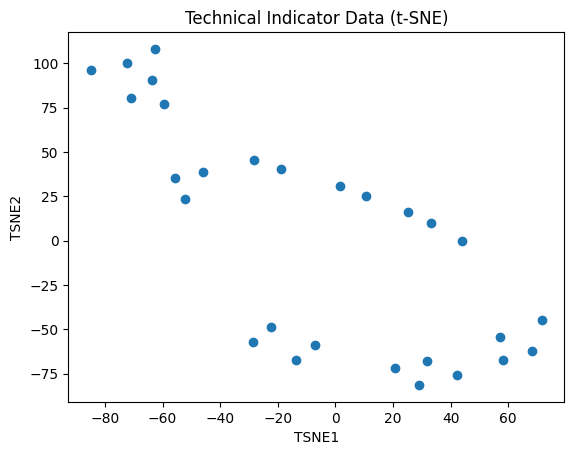

In [27]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load data for Apple stock from Yahoo Finance
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2022-04-25')
prices = data['Adj Close']

# Calculate the technical indicators
ma20 = ta.sma(prices, length=20)
ma50 = ta.sma(prices, length=50)
rsi = ta.rsi(prices, length=14)

# Combine the indicators into a single DataFrame
indicators = pd.DataFrame({'MA20': ma20, 'MA50': ma50, 'RSI': rsi})

# Drop rows with NaN values
indicators.dropna(inplace=True)

# Apply t-SNE on the indicator data with perplexity=5
tsne = TSNE(n_components=2, perplexity=5)
indicators_embedded = tsne.fit_transform(indicators)

# Plot the embedded indicator data
plt.scatter(indicators_embedded[:, 0], indicators_embedded[:, 1])
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('Technical Indicator Data (t-SNE)')
plt.show()


is an example of how to use t-SNE in Python with the sklearn library

[*********************100%%**********************]  1 of 1 completed


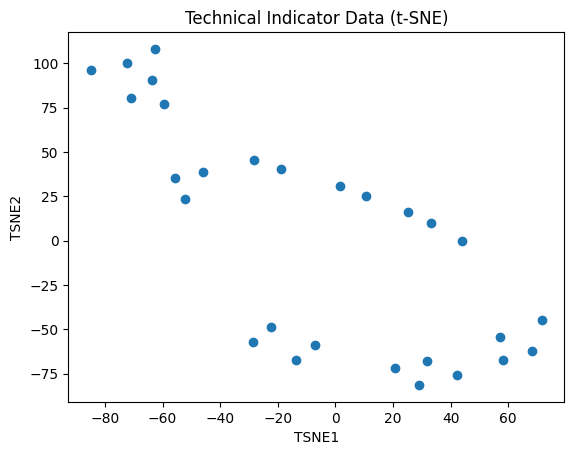

In [28]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load data for Apple stock from Yahoo Finance
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2022-04-25')
prices = data['Adj Close']

# Calculate the technical indicators
ma20 = ta.sma(prices, length=20)
ma50 = ta.sma(prices, length=50)
rsi = ta.rsi(prices, length=14)

# Combine the indicators into a single DataFrame
indicators = pd.DataFrame({'MA20': ma20, 'MA50': ma50, 'RSI': rsi})

# Drop rows with NaN values
indicators.dropna(inplace=True)

# Apply t-SNE on the indicator data
tsne = TSNE(n_components=2, perplexity=5)
indicators_embedded = tsne.fit_transform(indicators)

# Plot the embedded indicator data
plt.scatter(indicators_embedded[:, 0], indicators_embedded[:, 1])
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('Technical Indicator Data (t-SNE)')
plt.show()


The provided Python script defines a function detect_bullish_engulfing(df) that identifies bullish engulfing patterns within a given DataFrame of stock price data.

In [30]:
import pandas as pd
import numpy as np
import yfinance as yf

def detect_bullish_engulfing(df):
    bullish_engulfing = []

    for i in range(1, len(df)):
        current_candle = df.iloc[i]
        previous_candle = df.iloc[i-1]

        if (previous_candle['Close'] < previous_candle['Open']) and \
           (current_candle['Close'] > current_candle['Open']) and \
           (current_candle['Close'] > previous_candle['Open']) and \
           (current_candle['Open'] < previous_candle['Close']):
            bullish_engulfing.append(i)

    return bullish_engulfing

# Download historical stock price data using yfinance
ticker = 'AAPL'  # Replace with your desired stock ticker
price_data = yf.download(ticker, start='2023-01-01', end='2024-01-01')

# Ensure that 'Open' and 'Close' columns are available
if 'Open' in price_data.columns and 'Close' in price_data.columns:
    bullish_engulfing_indices = detect_bullish_engulfing(price_data)
    print(bullish_engulfing_indices)
else:
    print("Data does not contain 'Open' and 'Close' columns.")


[*********************100%%**********************]  1 of 1 completed

[8, 24, 47, 76, 117, 126, 168, 227]


This function computes two SMAs with different window lengths, compares their values, and generates signals indicating whether a short-term SMA has crossed above or below a long-term SMA

In [31]:
import pandas as pd
import numpy as np

def detect_sma_crossovers(df, short_window, long_window):
    sma_short = df['Close'].rolling(window=short_window).mean()
    sma_long = df['Close'].rolling(window=long_window).mean()

    crossover_signals = np.where(sma_short > sma_long, 1, -1)

    return crossover_signals

# Example dataset
data = {
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Close': np.random.randn(100).cumsum() + 100  # Random walk to simulate stock prices
}
price_data = pd.DataFrame(data)
price_data.set_index('Date', inplace=True)

# Detect SMA crossovers
signals = detect_sma_crossovers(price_data, short_window=50, long_window=200)

# Add signals to DataFrame
price_data['Signal'] = signals

print(price_data.head())


                 Close  Signal
Date                          
2023-01-01   99.709453      -1
2023-01-02   99.292675      -1
2023-01-03   99.288731      -1
2023-01-04   99.965655      -1
2023-01-05  100.053208      -1


The provided Python script defines a function detect_support_resistance(df, window) that calculates support and resistance levels based on the lowest low (support) and highest high (resistance) within a given window of historical stock price data. These levels are essential in technical analysis for identifying potential buying (support) and selling (resistance) points in the market.

In [32]:
import pandas as pd
import numpy as np

def detect_support_resistance(df, window):
    support = df['Low'].rolling(window=window).min()
    resistance = df['High'].rolling(window=window).max()

    return support, resistance

# Example dataset
data = {
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'High': np.random.randn(100).cumsum() + 105,  # Random walk to simulate high prices
    'Low': np.random.randn(100).cumsum() + 95    # Random walk to simulate low prices
}
price_data = pd.DataFrame(data)
price_data.set_index('Date', inplace=True)

# Detect support and resistance levels
support, resistance = detect_support_resistance(price_data, window=20)

# Add support and resistance to DataFrame
price_data['Support'] = support
price_data['Resistance'] = resistance

print(price_data.head())


                  High        Low  Support  Resistance
Date                                                  
2023-01-01  104.717652  96.000434      NaN         NaN
2023-01-02  105.529844  95.242371      NaN         NaN
2023-01-03  103.971368  93.281060      NaN         NaN
2023-01-04  104.578617  93.347478      NaN         NaN
2023-01-05  105.116472  94.110984      NaN         NaN


To implement a simple CNN in Python, traders can use the keras library, which provides a high-level interface for building and training neural networks:

In [39]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten

# Generate synthetic data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100)
open_prices = np.random.uniform(low=95, high=105, size=100)
high_prices = open_prices + np.random.uniform(low=0, high=2, size=100)
low_prices = open_prices - np.random.uniform(low=0, high=2, size=100)
close_prices = open_prices + np.random.uniform(low=-1, high=1, size=100)
volumes = np.random.uniform(low=1500000, high=2000000, size=100).astype(int)
targets = np.random.randint(0, 2, size=100)

# Create a DataFrame
data = {
    'date': dates,
    'open': open_prices,
    'high': high_prices,
    'low': low_prices,
    'close': close_prices,
    'volume': volumes,
    'target': targets
}
df = pd.DataFrame(data)

# Save to CSV
#df.to_csv('financial_data.csv', index=False)

# Load data from CSV file
data =  pd.DataFrame(data)

# Ensure all values are numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Check for NaN values and handle them
print("Data before dropping NaNs:")
print(data.head())

data = data.dropna()

print("Data after dropping NaNs:")
print(data.head())

# Split the data into input (X) and output (y) variables
X = data.drop(['target', 'date'], axis=1).values
y = data['target'].values

# Ensure the data is in float32 format
X = X.astype(np.float32)
y = y.astype(np.float32)

# Check the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Reshape X to be 3-dimensional for Conv1D input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Check the shape after reshaping
print("Shape of X after reshaping:", X.shape)

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32)


Data before dropping NaNs:
                  date        open        high         low       close  \
0  1672531200000000000   98.745401   98.808260   97.461338   97.848765   
1  1672617600000000000  104.507143  105.779964  104.338863  104.569852   
2  1672704000000000000  102.319939  102.948651  101.996682  102.401210   
3  1672790400000000000  100.986585  102.003726   99.189476  101.261445   
4  1672876800000000000   96.560186   98.375319   95.347328   97.012369   

    volume  target  
0  1551561       1  
1  1951276       0  
2  1752626       0  
3  1913228       0  
4  1660024       0  
Data after dropping NaNs:
                  date        open        high         low       close  \
0  1672531200000000000   98.745401   98.808260   97.461338   97.848765   
1  1672617600000000000  104.507143  105.779964  104.338863  104.569852   
2  1672704000000000000  102.319939  102.948651  101.996682  102.401210   
3  1672790400000000000  100.986585  102.003726   99.189476  101.261445   
4  167

WebSocket connection and continuously listens for incoming data from the Alpaca API.

In [ ]:
import websocket
import json
import os

ALPACA_API_URL = 'wss://data.alpaca.markets/stream'
ALPACA_API_KEY = os.environ['ALPACA_API_KEY']
ALPACA_SECRET_KEY = os.environ['ALPACA_SECRET_KEY']

def on_message(ws, message):
    data = json.loads(message)
    print(f'Received data: {data}')

def on_error(ws, error):
    print(f'Error: {error}')

def on_close(ws):
    print('Connection closed')

ws = websocket.WebSocketApp(ALPACA_API_URL,
                            on_message=on_message,
                            on_error=on_error,
                            on_close=on_close,
                            header={'APCA-API-KEY-ID': ALPACA_API_KEY,
                                    'APCA-API-SECRET-KEY': ALPACA_SECRET_KEY})

ws.run_forever()


The provided Python code demonstrates asynchronous programming using the asyncio library to fetch price data for multiple stock symbols concurrently

In [41]:
import asyncio

async def fetch_price(symbol):
    # Simulate fetching price data for the given symbol
    await asyncio.sleep(1)
    return 100.0

async def main():
    prices = await asyncio.gather(*(fetch_price(symbol) for symbol in ['AAPL', 'GOOG', 'TSLA']))
    print(prices)

# If the event loop is already running, use this approach
if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    if loop.is_running():
        # Run the main coroutine in the existing loop
        task = loop.create_task(main())
        # Wait until the task is completed
        await task
    else:
        # If no loop is running, start a new one
        loop.run_until_complete(main())


[100.0, 100.0, 100.0]


AI-driven trading algorithms can use line chart data to identify technical indicators and signals for potential trading opportunities.

[*********************100%%**********************]  1 of 1 completed


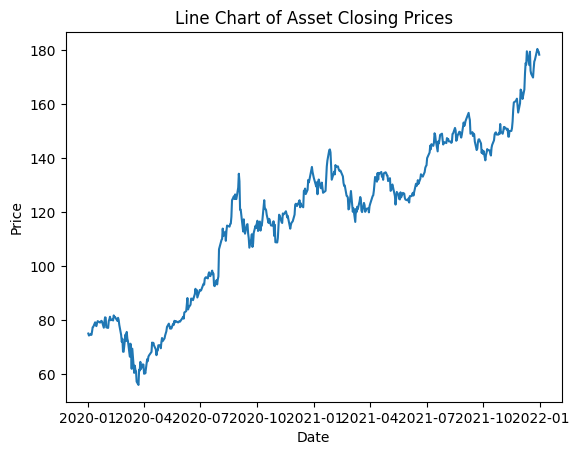

In [42]:
import matplotlib.pyplot as plt
import yfinance as yf

# Load historical price data
symbol = "AAPL"  # Example symbol
start_date = "2020-01-01"
end_date = "2021-12-31"

price_data = yf.download(symbol, start=start_date, end=end_date)

# Plot the line chart for the closing prices
plt.plot(price_data["Close"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Line Chart of Asset Closing Prices")
plt.show()


Bar charts are useful in high-performance algorithmic trading using AI because they provide a detailed view of price fluctuations over various time frames, allowing traders to analyze market sentiment and volatility.

[*********************100%%**********************]  1 of 1 completed


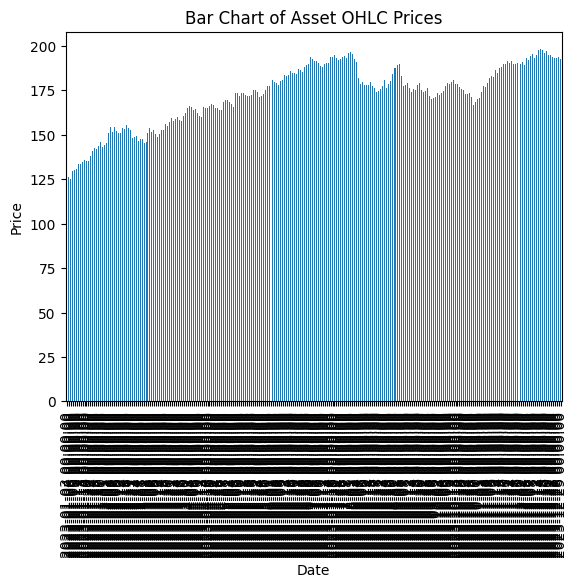

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf

# Load historical OHLC data
symbol = "AAPL"  # Example symbol
start_date = "2023-01-01"
end_date = "2023-12-31"

ohlc_data = yf.download(symbol, start=start_date, end=end_date, interval='1d', group_by='ticker')

# Plot the bar chart for the OHLC data
fig, ax = plt.subplots()
ohlc_data["Close"].plot(kind="bar", ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Bar Chart of Asset OHLC Prices")
plt.show()


The provided Python script utilizes the Matplotlib library to visualize historical Open-High-Low-Close (OHLC) data for a specified stock symbol, in this case, AAPL (Apple Inc.).

In [2]:
import yfinance as yf
import plotly.graph_objects as go

# Load historical OHLC data
symbol = "AAPL"  # Example symbol
start_date = "2023-01-01"
end_date = "2023-12-31"

ohlc_data = yf.download(symbol, start=start_date, end=end_date)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=ohlc_data.index,
                                     open=ohlc_data['Open'],
                                     high=ohlc_data['High'],
                                     low=ohlc_data['Low'],
                                     close=ohlc_data['Close'])])

fig.update_layout(title="Candlestick Chart of Asset OHLC Prices",
                  xaxis_title="Date",
                  yaxis_title="Price")
fig.show()


[*********************100%%**********************]  1 of 1 completed


•	Heatmaps are a data visualization technique used in high-performance algorithmic trading using AI.

[*********************100%%**********************]  5 of 5 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['AMZN', 'MSFT', 'AAPL', 'META', 'GOOGL']: YFChartError('%ticker%: Invalid input - start date cannot be after end date. startDate = 1672549200, endDate = 1640926800')
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



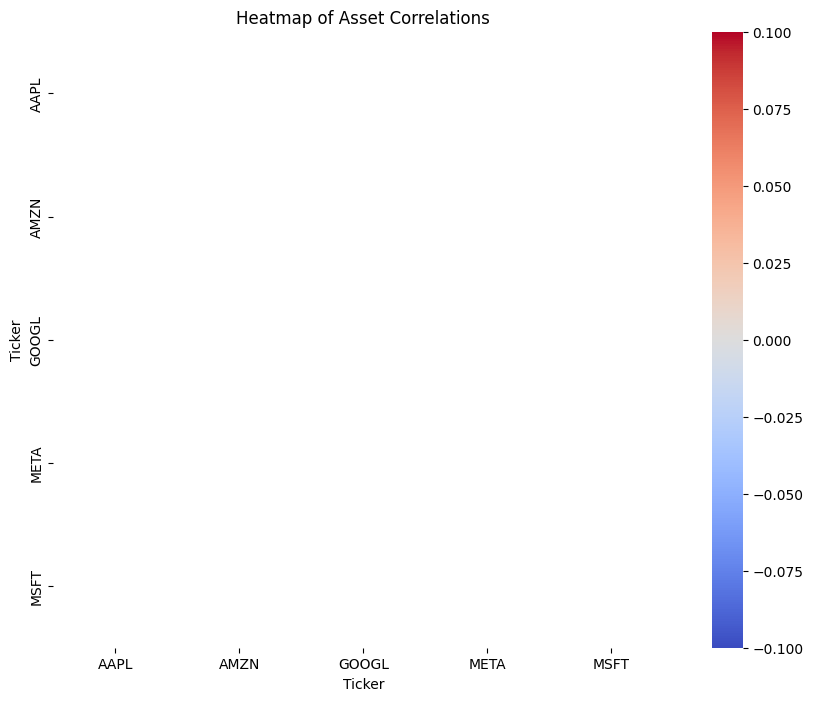

In [3]:
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of symbols for multiple assets
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]

# Download the historical price data for multiple assets
start_date = "2023-01-01"
end_date = "2021-12-31"
price_data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Calculate the correlation matrix
correlation_matrix = price_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of Asset Correlations")
plt.show()


•	Scatter plots are used in high-performance algorithmic trading using AI to visualize the relationship between two variables by plotting data points on a two-dimensional plane.

[*********************100%%**********************]  2 of 2 completed


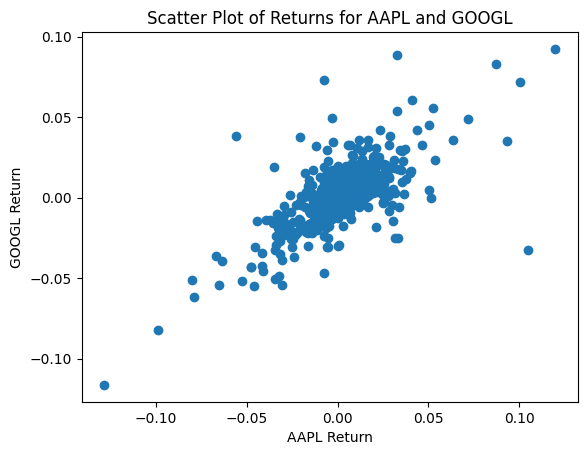

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of symbols for two assets
symbols = ["AAPL", "GOOGL"]

# Download the historical price data for two assets
start_date = "2020-01-01"
end_date = "2021-12-31"
asset_data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Calculate returns for each asset
asset_data["Asset1_Return"] = asset_data[symbols[0]].pct_change()
asset_data["Asset2_Return"] = asset_data[symbols[1]].pct_change()

# Create the scatter plot
plt.scatter(asset_data["Asset1_Return"], asset_data["Asset2_Return"])
plt.xlabel(f"{symbols[0]} Return")
plt.ylabel(f"{symbols[1]} Return")
plt.title(f"Scatter Plot of Returns for {symbols[0]} and {symbols[1]}")
plt.show()


•	Network graphs, also called graph visualizations, are a data visualization technique used in high-performance algorithmic trading using AI.

In [11]:
import yfinance as yf
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define the list of symbols for multiple assets
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]

# Download the historical price data for multiple assets
start_date = "2020-01-01"
end_date = "2021-12-31"
price_data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Calculate the correlation matrix
correlation_matrix = price_data.corr()

# Inspect the correlation matrix
print(correlation_matrix)

# Convert the correlation matrix to a DataFrame
correlation_data = correlation_matrix.stack().reset_index()
correlation_data.columns = ["Asset1", "Asset2", "Correlation"]

# Remove self-loops (correlation with itself) for clarity
correlation_data = correlation_data[correlation_data["Asset1"] != correlation_data["Asset2"]]

# Remove duplicate edges (correlation between A-B and B-A is the same)
correlation_data = correlation_data[correlation_data["Asset1"] < correlation_data["Asset2"]]

# Create a network graph from the correlation data
G = nx.Graph()
for _, row in correlation_data.iterrows():
    G.add_edge(row["Asset1"], row["Asset2"], weight=row["Correlation"])

# Draw the network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Network Graph of Asset Correlations")
plt.show()


[*********************100%%**********************]  5 of 5 completed

Ticker      AAPL      AMZN     GOOGL      META      MSFT
Ticker                                                  
AAPL    1.000000  0.897824  0.897157  0.916069  0.936209
AMZN    0.897824  1.000000  0.731418  0.863662  0.805830
GOOGL   0.897157  0.731418  1.000000  0.916873  0.971111
META    0.916069  0.863662  0.916873  1.000000  0.905334
MSFT    0.936209  0.805830  0.971111  0.905334  1.000000


ValueError: cannot insert Ticker, already exists